In [5]:
import numpy as np

class CausalBandit:
    def __init__(self, true_parameters):
        self.true_parameters = true_parameters

    def pull_arm(self, arm):
        return np.random.binomial(1, self.true_parameters[arm])

class Agent:
    def __init__(self, num_arms):
        self.num_arms = num_arms
        self.total_rewards = [0] * num_arms
        self.total_pulls = [0] * num_arms

    def choose_arm(self):
        pass

    def update(self, arm, reward):
        self.total_rewards[arm] += reward
        self.total_pulls[arm] += 1

class EpsilonGreedyAgent(Agent):
    def __init__(self, num_arms, epsilon):
        super().__init__(num_arms)
        self.epsilon = epsilon

    def choose_arm(self):
        if np.random.random() < self.epsilon:
            return np.random.choice(self.num_arms)
        else:
            return np.argmax([r / max(1, p) for r, p in zip(self.total_rewards, self.total_pulls)])

class UCB1Agent(Agent):
    def choose_arm(self):
        ucb_values = [r / max(1, p) + np.sqrt(2 * np.log(sum(self.total_pulls)) / max(1, p)) for r, p in zip(self.total_rewards, self.total_pulls)]
        return np.argmax(ucb_values)

class ThompsonSamplingAgent(Agent):
    def choose_arm(self):
        sampled_parameters = [np.random.beta(r + 1, p - r + 1) for r, p in zip(self.total_rewards, self.total_pulls)]
        return np.argmax(sampled_parameters)

def grid_search(agents, true_parameters_grid, num_trials):
    regrets = {agent.__class__.__name__: [] for agent in agents}
    for true_parameters in true_parameters_grid:
        for agent in agents:
            bandit = CausalBandit(true_parameters)
            for _ in range(num_trials):
                chosen_arm = agent.choose_arm()
                reward = bandit.pull_arm(chosen_arm)
                agent.update(chosen_arm, reward)
                regret = max(true_parameters) - true_parameters[chosen_arm]
                regrets[agent.__class__.__name__].append(regret)
    return regrets

# Define parameters
num_arms = 4
true_parameters_grid = [[0.1, 0.2, 0.3, 0.4], [0.2, 0.3, 0.4, 0.5]]  # Example grid of Bernoulli parameters
num_trials = 1000
epsilon_values = [0.1, 0.2, 0.3]  # Example epsilon values for epsilon-greedy agent

# Initialize agents
agents = [EpsilonGreedyAgent(num_arms, epsilon) for epsilon in epsilon_values] + [UCB1Agent(num_arms), ThompsonSamplingAgent(num_arms)]

# Perform grid search
regrets = grid_search(agents, true_parameters_grid, num_trials)

# Calculate cumulative regrets
cumulative_regrets = {agent: sum(regrets[agent]) for agent in regrets}

print("Cumulative Regrets:")
for agent, regret in cumulative_regrets.items():
    print(f"{agent}: {regret}")


Cumulative Regrets:
EpsilonGreedyAgent: 220.19999999999916
UCB1Agent: 59.900000000000254
ThompsonSamplingAgent: 21.399999999999977


/var/folders/j0/wmsz9yf51jbg3gxkfqp41vcw0000gn/T/ipykernel_9922/2241351462.py:36: RuntimeWarning: divide by zero encountered in log
  ucb_values = [r / max(1, p) + np.sqrt(2 * np.log(sum(self.total_pulls)) / max(1, p)) for r, p in zip(self.total_rewards, self.total_pulls)]
/var/folders/j0/wmsz9yf51jbg3gxkfqp41vcw0000gn/T/ipykernel_9922/2241351462.py:36: RuntimeWarning: invalid value encountered in sqrt
  ucb_values = [r / max(1, p) + np.sqrt(2 * np.log(sum(self.total_pulls)) / max(1, p)) for r, p in zip(self.total_rewards, self.total_pulls)]


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
1
0
0
2
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


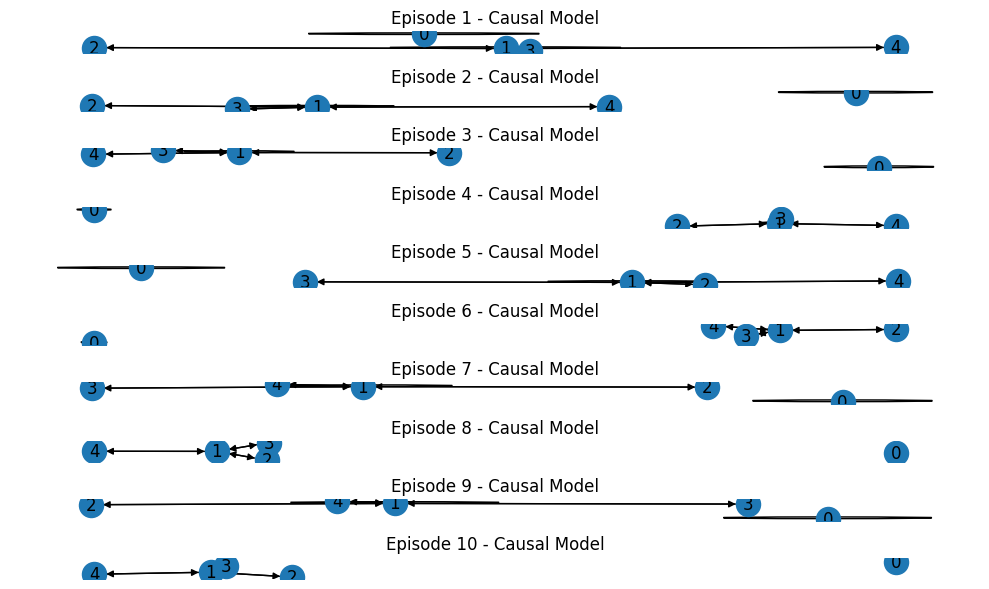

In [60]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

# Define the environment
class Environment:
    def __init__(self, num_vars, causal_graph):
        self.num_vars = num_vars
        self.causal_graph = causal_graph
        self.state = np.random.normal(0, 0.1, num_vars)

    def step(self, action):
        # Apply the action (intervention) to the corresponding variable
        self.state[action] = np.random.normal()

        # Update the state based on the causal graph
        for node in nx.topological_sort(self.causal_graph):
            parents = list(self.causal_graph.predecessors(node))
            if parents:
                self.state[node] = sum(self.state[parent] for parent in parents) + np.random.normal(0, 0.1)

        # Compute the reward (dummy implementation)
        reward = np.abs(np.sum(self.state))

        return self.state.copy(), reward

# Define the agent
class CausalAgent:
    def __init__(self, num_vars, causal_graph):
        self.num_vars = num_vars
        self.causal_graph = causal_graph
        self.causal_model = nx.DiGraph()
        self.intervention_count = np.zeros((num_vars, num_vars))
        self.causal_model_history = []  # Store causal model updates
        self.max_history_size = 10  # Maximum number of stored causal models

    def store_causal_model(self):
      # Append the current causal model to the history list
        self.causal_model_history.append(self.causal_model.copy())
        
        # Trim the history list if it exceeds the maximum size
        if len(self.causal_model_history) > self.max_history_size:
            self.causal_model_history = self.causal_model_history[-self.max_history_size:]


    def plot_causal_model_updates(self):
        plt.figure(figsize=(10, 6))
        for i, causal_model in enumerate(self.causal_model_history):
            plt.subplot(len(self.causal_model_history), 1, i+1)
            nx.draw(causal_model, with_labels=True)
            plt.title(f'Episode {i+1} - Causal Model')
        plt.tight_layout()
        plt.show()

    def update_causal_model(self, state, action, next_state):
        
        # Simplified causal discovery rules
        self.causal_model.add_nodes_from(range(self.num_vars))

        # Find the variable that changed between the current state and next state
        changed_var = np.where(next_state != state)[0]

        if len(changed_var) > 0:
            changed_var = changed_var[0]  # Select the first changed variable
            # Association rule
            self.causal_model.add_edge(action, changed_var)

            # Causation rule
            if not self.causal_model.has_edge(changed_var, action):
                self.causal_model.add_edge(changed_var, action)

        self.intervention_count[action] += 1


    def select_action(self, state, reward):
        # Epsilon-greedy action selection
        epsilon = 0.5
        if random.random() < epsilon:
            return random.randint(0, self.num_vars - 1)

        # Add missing nodes to the causal graph
        for i in range(self.num_vars):
            if i not in self.causal_model.nodes:
                self.causal_model.add_node(i)

        # Restrict action set to actionable variables that are ancestors of the reward
        actionable_vars = [var for var in range(self.num_vars) if nx.has_path(self.causal_model, var, self.num_vars - 1)]

        # Select the action based on intrinsic reward
        intrinsic_rewards = [self.compute_intrinsic_reward(var, reward) for var in actionable_vars]
        print(np.argmax(intrinsic_rewards))
        return actionable_vars[np.argmax(intrinsic_rewards)]

    def compute_intrinsic_reward(self, var, reward):
        # Compute intrinsic reward based on the causal model's stability
        neighbors = list(self.causal_model.neighbors(var))
        intrinsic_reward = 0
        for neighbor in neighbors:
            rel_count = self.intervention_count[var, neighbor]
            intrinsic_reward +=  np.arctan(rel_count) / (rel_count + 1e-6)
        return intrinsic_reward #+ reward

# Simulate the agent
num_vars = 5
causal_graph = nx.DiGraph()
causal_graph.add_nodes_from(range(num_vars))

# Define the causal graph (dummy example)
for i in range(num_vars - 1):
    causal_graph.add_edge(i, i + 1)

env = Environment(num_vars, causal_graph)
agent = CausalAgent(num_vars, causal_graph)

for episode in range(500):
    state = env.state.copy()
    reward = 0
    for t in range(100):
        action = agent.select_action(state, reward)
        next_state, reward = env.step(action)
        agent.update_causal_model(state, action, next_state)
        agent.store_causal_model()
        state = next_state

# Print the learned causal model
print("Learned Causal Model:")
print(agent.causal_model.edges())
print(agent.causal_model_history)
agent.plot_causal_model_updates()

In [55]:
## Define a function to plot the causal model
#def plot_causal_model(causal_model, label):
#    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
#    pos = nx.spring_layout(causal_model)  # Layout algorithm for node positioning
#
#    # Draw the causal model with adjusted parameters
#    nx.draw(causal_model, pos, with_labels=True, node_size=1000, font_size=10, node_color='skyblue', edge_color='gray', width=1.5, alpha=0.8)
#    plt.title('Causal Model')
#    plt.legend([label], loc='upper left')  # Add the episode label to the legend
#    plt.show()
#
## Plot the stored causal models
#plt.figure(figsize=(10, 6))
#for i, causal_model in enumerate(agent.causal_model_history):
#    plot_causal_model(causal_model, label=f'Episode {i+1}')
#plt.xlabel('Nodes')
#plt.ylabel('Edges')
#plt.title('Evolution of Causal Model over Episodes')
#plt.show()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
2
2
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
1
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


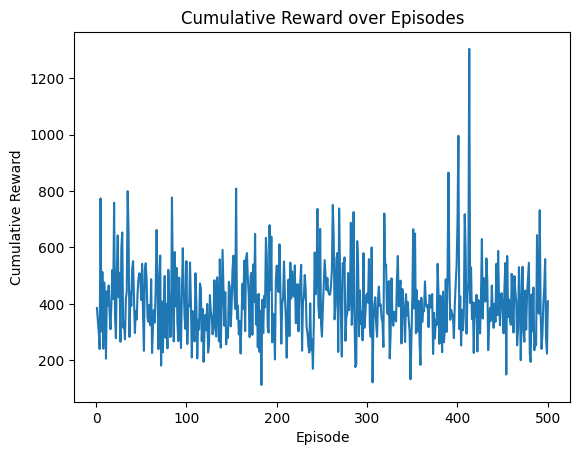

In [61]:
import matplotlib.pyplot as plt

# Initialize lists to store episode rewards
episode_rewards = []

# Simulate the agent and collect rewards
for episode in range(500):
    state = env.state.copy()
    total_reward = 0
    reward = 0
    for t in range(100):
        action = agent.select_action(state, reward)
        next_state, reward = env.step(action)
        agent.update_causal_model(state, action, next_state)
        state = next_state
        total_reward += reward
    episode_rewards.append(total_reward)

# Plot the cumulative reward over episodes
plt.plot(range(1, len(episode_rewards) + 1), episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward over Episodes')
plt.show()


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
3
0
0
0


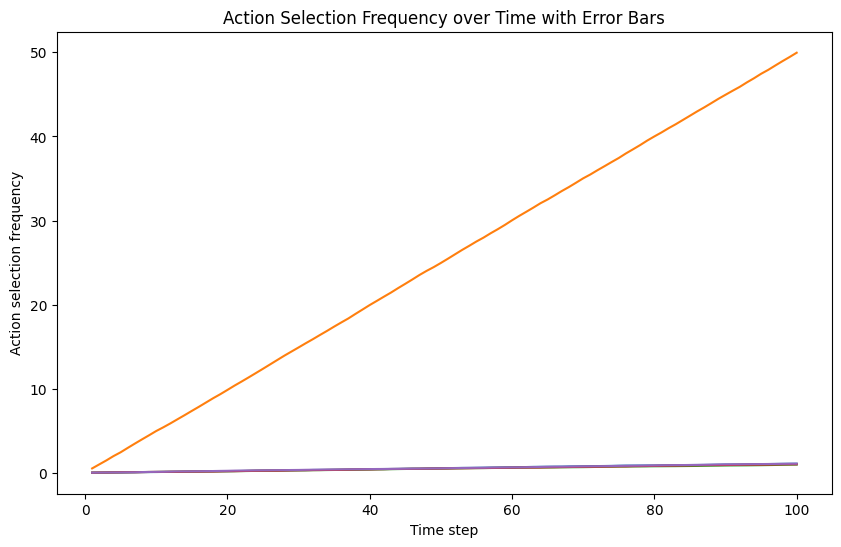

In [62]:
import matplotlib.pyplot as plt

N = 100
# Initialize a dictionary to store action frequencies
action_freq = {action: 0 for action in range(num_vars)}

# Simulate the agent and collect action frequencies
for episode in range(500):
    state = env.state.copy()
    reward = 0
    for t in range(N):
        action = agent.select_action(state, reward)
        next_state, reward = env.step(action)
        agent.update_causal_model(state, action, next_state)
        state = next_state
        action_freq[action] += 1  # Increment action frequency

# Calculate action selection frequencies over time and their standard deviations
#action_freq_over_time = {action: [sum(action_freq[action][:t]) / (episode + 1) for t in range(1, N + 1)] for action in range(num_vars)}
#action_std_over_time = {action: [np.std(action_freq[action][:t]) for t in range(1, N + 1)] for action in range(num_vars)}

print(action_freq)
# Plot action selection frequencies over time with error bars
plt.figure(figsize=(10, 6))
for action in range(num_vars):
    plt.errorbar(range(1, N + 1), action_freq_over_time[action], label=f'Action {action}')
plt.xlabel('Time step')
plt.ylabel('Action selection frequency')
plt.title('Action Selection Frequency over Time with Error Bars')
#plt.legend()
plt.show()


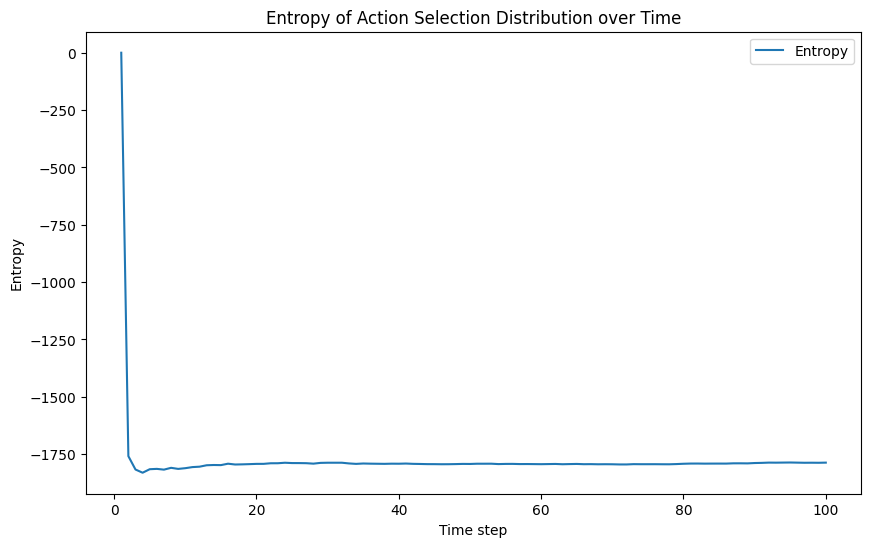

In [42]:
# Calculate action selection frequencies over time
action_freq_over_time = {action: [sum(action_freq[action][:t]) for t in range(1, len(action_freq[action]) + 1)] for action in range(num_vars)}

# Calculate entropy of the action selection distribution over time
entropy_over_time = []
for t in range(len(action_freq_over_time[0])):
    if t == 0:
        entropy_over_time.append(0)  # Skip calculation for the first time step
    else:
        action_probs = [sum(action_freq[action][:t]) / t for action in range(num_vars)]
        entropy = -np.sum([p * np.log(p) for p in action_probs if p > 0])
        entropy_over_time.append(entropy)

# Plot entropy of action selection distribution over time
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(entropy_over_time) + 1), entropy_over_time, label='Entropy')
plt.xlabel('Time step')
plt.ylabel('Entropy')
plt.title('Entropy of Action Selection Distribution over Time')
plt.legend()
plt.show()
